이상치

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

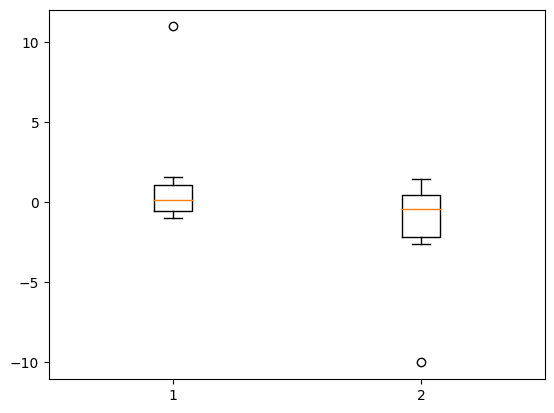

In [5]:
df = pd.DataFrame(np.random.randn(8,3), columns=['c1','c2','c3'])
df.loc[1,'c1'] = 11
df.loc[3,'c3'] = -10
# 박스플롯으로 시각화
plt.boxplot([df['c1'],df['c3']])
plt.show()

데이터 전처리 방법
  - 목적에 맞는 변수 추출
    - 상관분석과 주성분 분석
      - 상관분석:corr()
      - 주성분 분석은 pca를 이용

<Axes: >

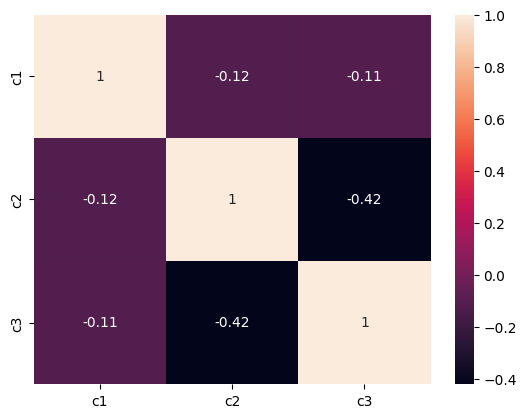

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
pca_result

array([[-3.10494965, -0.96273827],
       [ 8.98914055, -3.39945894],
       [-1.82727684, -2.44322226],
       [ 2.51855818,  8.18083147],
       [-2.23733258, -0.50633485],
       [-0.90971031,  1.06204536],
       [-3.03772337, -0.5966829 ],
       [-0.39070598, -1.33443962]])

no show환자들의 특징을 파악해서 발생률을 줄일수 있는 아이디어를 제시

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/medical.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [13]:
# AppointmentDay ; 병원에 머무른 날, Neighbourhood:병원 위치

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


통계량을 이용하여 이상치 제거

In [17]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [19]:
df = df[df.Age>0]
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472809e+14,5.675434e+06,38.316085,0.323264
std,2.558256e+14,7.133274e+04,22.466214,0.467725
min,3.920000e+04,5.030230e+06,1.000000,0.000000
25%,4.170000e+12,5.640490e+06,19.000000,0.000000
50%,3.170000e+13,5.680744e+06,38.000000,0.000000
75%,9.430000e+13,5.725634e+06,56.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


수치형 데이터 변환

In [23]:
df['No-show'] = df['No-show'].map({'Yes':1,'No':0})
df['No-show'].value_counts()

0    85307
1    21680
Name: No-show, dtype: int64

datetime으로 변환 : to_datetime()

In [26]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   SMS_received    106987 non-null  int64              
 8   No-show         106987 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.2+ MB
